# Getting Started with Deep Learning: Crash Course in Neural Networks

## Coding a single neuron

In [1]:
inputs = [5,4,2,1,6]
weights = [0.1,0.3,0.05,0.4,0.9]
bias = 4

In [2]:
#calculating the neuron output values

import numpy as np

output = np.dot(inputs,weights) + bias
output

11.600000000000001

## Coding a single layer

In [3]:
inputs = [5,4,2,1,6]
weights =[
          [0.1,0.3,0.05,0.4,0.9],
          [0.3,0.15,0.4,0.7,0.2]
]
biases = [4,2]

In [4]:
#using matrix multiplication between inputs and transposed weights and add the corresponding biases

layer = np.dot(inputs,np.transpose(weights)) + biases
layer

array([11.6,  6.8])

# Activation functions

## Step function

In [5]:
#coding the step function

def step_function(x):
  return 1 if x > 0 else 0

In [6]:
#creating values to be fed into the step function

xs = np.arange(-10,10,step=0.1)
ys = [step_function(x) for x in xs]

Text(0.5, 1.0, 'Step activation function')

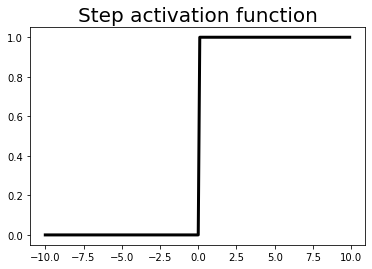

In [7]:
import matplotlib.pyplot as plt

#visualizing the function

plt.plot(xs,ys, color = "#000000",lw=3)
plt.title("Step activation function",fontsize=20)

## Sigmoid function

In [8]:
#Creating the sigmoid function

def sigmoid_function(x):
  return 1/(1+np.exp(-x))


In [9]:
#creating value for the sigmoid function

xs = np.arange(-10,10,step=0.1)
ys = [sigmoid_function(x) for x in xs]

Text(0.5, 1.0, 'Sigmoid activation function')

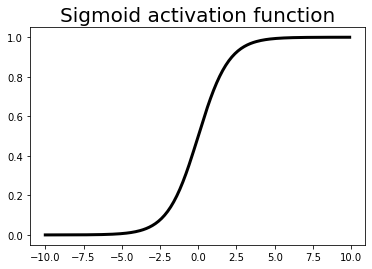

In [10]:
#visualizing the function with matplotlib lib

plt.plot(xs,ys,color="#000000",lw=3)
plt.title("Sigmoid activation function",fontsize=20)

## Hyperbolic tangent function

In [11]:
#creating the tanh function

def tanh_function(x):
  return np.tanh(x)

In [12]:
xs = np.arange(-10,10,step=0.1)
ys = [tanh_function(x) for x in xs]

Text(0.5, 1.0, 'Tanh activation function')

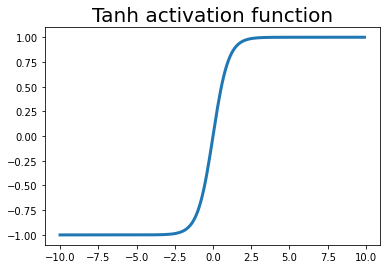

In [13]:
#plotting the tanh function

plt.plot(xs,ys,lw=3)
plt.title("Tanh activation function",fontsize=20)

## Rectified linear unit function

In [14]:
#implementing the ReLU function

def relu_function(x):
  return np.maximum(0,x)

In [15]:
#creating input values for this function

xs = np.arange(-10,10,step=0.1)
ys = [relu_function(x) for x in xs]

Text(0.5, 1.0, 'Relu activation function')

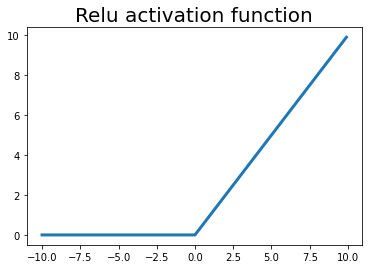

In [16]:
#plotting the relu function

plt.plot(xs,ys,lw=3)
plt.title("Relu activation function",fontsize=20)

# Using neural networks to classify handwritten digits

In [17]:
#importing libs 
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

In [18]:
#proceeding with data gathering and preparation. Downloading train and test images

(train_images,train_labels), (test_images,test_labels) = datasets.mnist.load_data()

train_images,test_images = train_images/255.0, test_images / 255.0 

11501568/11490434 [==============================] - 0s 0us/step


In [27]:
#creating the deep learning neural net architecture

model = models.Sequential([
  layers.Flatten(input_shape=(28, 28)),
  layers.Dense(128, activation='relu'),
  layers.Dense(10)
])

In [28]:
#Viewing the model 

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [29]:
#compiling the model

model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

In [30]:
#training the model

history = model.fit(
    train_images, 
    train_labels, 
    epochs=10, 
    validation_data=(test_images, test_labels)
)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2620 - accuracy: 0.9258 - val_loss: 0.1465 - val_accuracy: 0.9567
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1179 - accuracy: 0.9640 - val_loss: 0.1185 - val_accuracy: 0.9612
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0814 - accuracy: 0.9754 - val_loss: 0.0900 - val_accuracy: 0.9718
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0611 - accuracy: 0.9811 - val_loss: 0.0857 - val_accuracy: 0.9736
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0484 - accuracy: 0.9849 - val_loss: 0.0806 - val_accuracy: 0.9749
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0361 - accuracy: 0.9896 - val_loss: 0.0758 - val_accuracy: 0.9774
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0312 - accuracy: 0.9905 - val_loss: 0.0814 - val_accuracy:

In [33]:
#testing the model on new data using the predict method

import numpy as np

prediction = model.predict(test_images[0].reshape(-1,784) )
print(f'True digit = {test_labels[0]}')
print(f'Predicted digit = {np.argmax(prediction)}')



True digit = 7
Predicted digit = 7
